
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> In this section, we will delete all irrelevant data and change any data types if needed
 

As we can see in the dataframe description. the minimum age is -1 which is irrational. We want to make sure there are no entries with age less than 0.

In [7]:
df.drop(df.loc[df['Age'] < 0].index, inplace=True)

Also from the description, you can see that the maximum value of Handcap column is 4, but this column's data is supposed to be equal to 0 or 1 only. So we can either delete the rows with false values or change these values to 1, in this case we will delete the rows just to make sure.

In [8]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
df.drop(df.loc[df['Handcap'] > 1].index, inplace=True)

In [10]:
# make sure these changes are applied to the main data frame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will delete two columns (patient id, appointment id) as we will not need them in our analysis

In [11]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


we will compute the waiting time between scheduling and the appointment day through different steps
> 1- change the data type from object to datetime.

> 2- ignore the hours as it is not mentioned properly in the appointment day column.

> 3- compute the waiting days by calculating the difference between the two days of scheduling and the appointment day

In [12]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date
df['waiting_days'] = (df.AppointmentDay - df.ScheduledDay).dt.days
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [13]:
# First, let's see the number of people who showed to their appointment versus the number of people that did not.
df['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

We will split our data frame into two groups for better analysis

In [14]:
show = df[df['No-show'] == 'No']
missed = df[df['No-show'] == 'Yes']

We will start our analysis with the age factor

### 1- Age, chronic desease

First, let's see a histogram to show the relation between age and people showing to their appointment

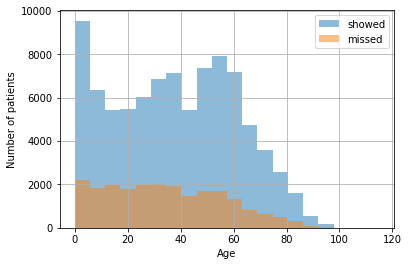

In [15]:
show.Age.hist(alpha=0.5, bins=20, label='showed')
missed.Age.hist(alpha=0.5, bins=20, label='missed')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend();

Although there is a big difference between the total quantity of the two categories, the graph shows there is a drop in the younger age from 15 to 25 years.

We can approve this graph by calculating the mean age for each category

In [16]:
print(show.Age.mean())
print(missed.Age.mean())

37.7770900294
34.2791094353


As you can see, the mean age of the people who missed their appointment is less than the people who showed to their appointment.

I want to see if the age factor is also related to illness as older people are more likely to have chronic deseases

I will add a new column to add all the deseases columns so that 0 means that this patient is clear and above 0 means that he has at least one chronic desease

In [17]:
df['chronic_desease'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days,chronic_desease
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,2


In [18]:
df.query('chronic_desease == 0')['Age'].mean(), df.query('chronic_desease > 0')['Age'].mean()

(30.515443326913473, 58.105863502842098)

Calculating the mean age shows a higher mean age for people with chronic desease and that can also be a reason for older people to be more likely to show to their appointments.

### 2- Neighborhood, waiting days

Second factor to analyze will be the location of the hospital, we will start by showing a plot of all the hospitals regarding the number of people showing and missing their appointment

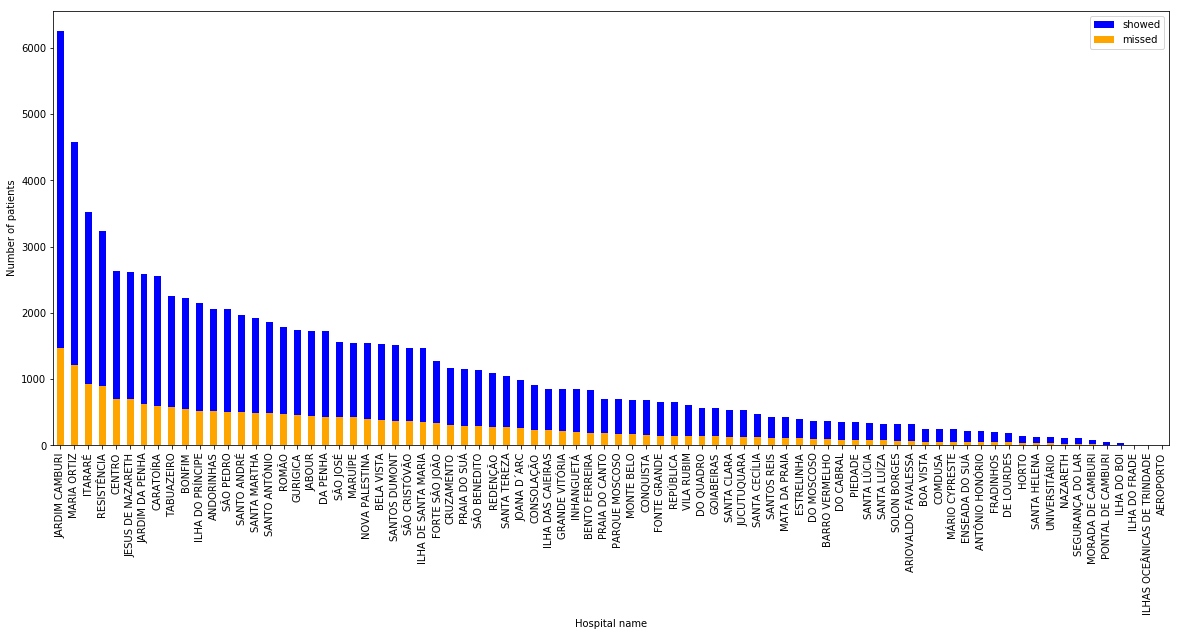

In [19]:
show.Neighbourhood.value_counts().plot(kind='bar',figsize=(20,8), color='blue', label='showed')
missed.Neighbourhood.value_counts().plot(kind='bar',figsize=(20,8), color='orange', label='missed')
plt.xlabel('Hospital name')
plt.ylabel('Number of patients')
plt.legend();

This graph shows that the proportion between the two categories is almost the same for all the hospitals.

The graph also shows that some hospitals have higher rate of patients than others so we need to take another factor into consideration which is the waiting time and figure out if there is a relation between these two factors that might affect the dependant factor which is people showing to their appointment or not.

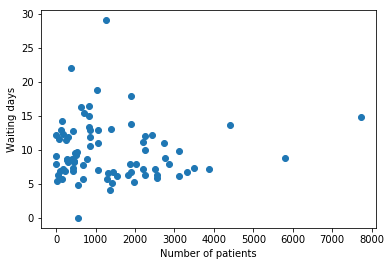

In [20]:
plt.scatter(df.Neighbourhood.value_counts(), df.groupby('Neighbourhood').waiting_days.mean())
plt.xlabel('Number of patients')
plt.ylabel('Waiting days');

In this scatter plot, each dot represents a hospital, the x axis shows the total number of patients and the y axis represents the mean number of waiting days.

This scatter plot shows that there is no relation between the rate of patients and the waiting days. It means that crowded hospitals can have less waiting time than less crowded hospitals and vice versa.

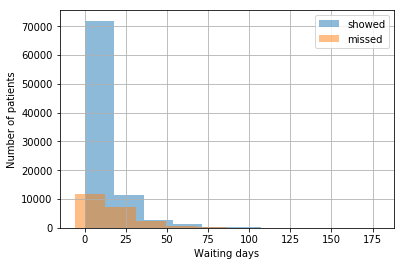

In [21]:
show.waiting_days.hist(alpha=0.5, bins=10, label='showed')
missed.waiting_days.hist(alpha=0.5, bins=10, label='missed')
plt.xlabel('Waiting days')
plt.ylabel('Number of patients')
plt.legend();

This graph shows that people that are most likely to show to their appointments are the one who schedule their appointments on the same day as its proportion to people missing their appointment is very high.

Before moving on with the next factors, we will define a function that will plot a bar chart to help us have a clearer code as we will be exploring 1D variables.

In [22]:
def graph(variable):
    show[variable].value_counts().plot(kind='bar', color='blue', label='showed')
    missed[variable].value_counts().plot(kind='bar', color='orange', label='missed')
    plt.xlabel(variable)
    plt.ylabel('Number of patients')
    plt.legend();

### 3- SMS received

The third factor we will analyze is whether the patient received a sms after scheduling or not

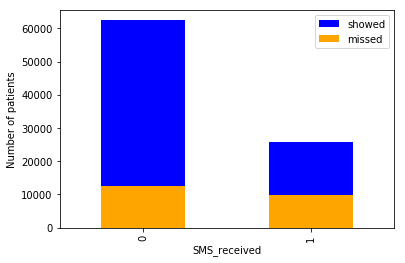

In [23]:
graph('SMS_received')

This graph shows that although most people did not receive sms, they showed to their appointments.

Regarding the people who received sms, the ratio between the people who showed and the people who missed is much lower.

### 4- Gender

The last factor we will analyze is the gender.

We will show a graph with the total number of males and females that showed and missed their appointments.

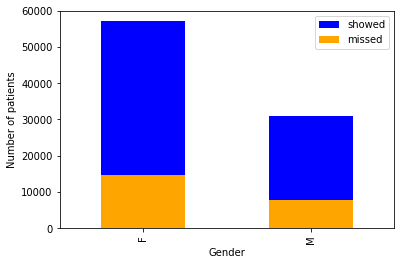

In [24]:
graph('Gender')

This bar chart shows that females are more likely to show to their appointments than male patients.

<a id='conclusions'></a>
## Conclusions

> In this report, We went through a dataset collecting information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> We analyzed several factors to identify the main factors that can have an effect on the main question.

> Starting with the age factor and connecting it with the chronic desease factor, we found out that people that are more likely to miss their appointments are between the age of 15 and 25 years, also we figued that older people are more likely to have chronic desease and that is why they may need to take more care for their health.

> The second factor was the neighborhood or the location of the hospital, we did not find much relation between the location and people showing to their appointments. However, we observed that some hospitals are much crowded than others, that is why we had to look at the waiting time and see if it is related to it, but we did not find much relation as there were no significant correlation between the two factors.

> Looking at the third factor which is whether the patient received the sms or not, we found that most people did not receive sms. Moreover, ratio of the people who received sms and did not show is high compared to people who showed to their appointments.

> Finally, we looked at the gender of the patients, and we could see that female patients were more likely to show to their appointments than male patients.

>For the conclusion, we can say that age and gender had the greater effect on people showing to their appointments or not than other factors.

### Limitations

> Although some of the hospitals have very little number of patients, they have long waiting days. This may means that they have missing data for these hospitals.

> This data is missing mentioning the doctor specialization needed for each appointment, this could also affect the waiting period in the hospitals, or may be some people were transferred from one hospital to another due to shortage in some specialization inside the hospital

> The urgency of the appointment should be mentioned, meaning that if someone scheduled an appointment and found a long waiting period and it was not an urgent matter, they will most probably ignore the appointment.

## Submitting your Project 

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0